Bulilding Simple Neural Network using the nn.Module

In [2]:
# Importing Everything here no need to alter this !!!!
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784,128) #Input Layer
        self.fc2 = nn.Linear(128,64)  #Hidden Layer
        self.fc3 = nn.Linear(64,10)   #Output Layer

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1) #dim=1 refers to applying the softmax across each rows.
        return x

# Initiate The Network
model = SimpleNN()
print(model)


SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Training a Neural Network on MNIST dataset

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [7]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784,128) #Input Layer
        self.fc2 = nn.Linear(128,64)  #Hidden Layer
        self.fc3 = nn.Linear(64,10)   #Output Layer

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1) #dim=1 refers to applying the softmax across each rows.
        return x

# Initiate The Network
model = SimpleNN()
print(model)


# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1, 6):  # 5 epochs
    running_loss = 0.0
    for images, labels in trainloader:
        # Flatten the images into vectors
        images = images.view(images.shape[0], -1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    print(f"Epoch {epoch}, Loss: {running_loss/len(trainloader)}")


SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch 1, Loss: 2.299533878072103
Epoch 2, Loss: 2.27436104927063
Epoch 3, Loss: 2.115741876602173
Epoch 4, Loss: 1.8569794114430744
Epoch 5, Loss: 1.7540590317408244


Evaluating the Model trained on MNIST

In [8]:

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Accuracy: 80.69%


CNN - CIFAR10.  DATASET

Using device: cuda
Epoch [1/10] - Loss: 1.3182
Epoch [2/10] - Loss: 0.9118
Epoch [3/10] - Loss: 0.7318
Epoch [4/10] - Loss: 0.5775
Epoch [5/10] - Loss: 0.4356
Epoch [6/10] - Loss: 0.3006
Epoch [7/10] - Loss: 0.1915
Epoch [8/10] - Loss: 0.1221
Epoch [9/10] - Loss: 0.0876
Epoch [10/10] - Loss: 0.0753


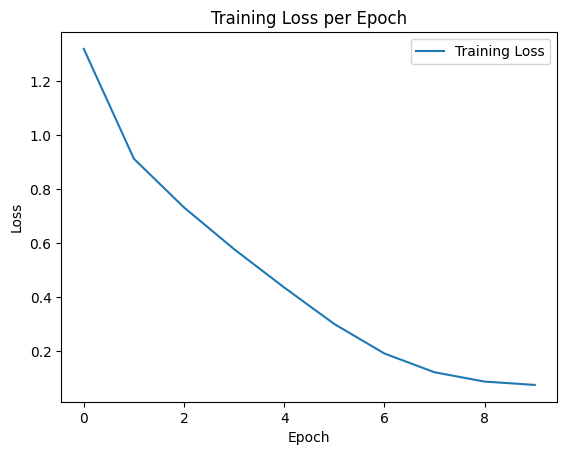


✅ Test Accuracy: 72.33%
Model saved as cnn_cifar10.pth


In [11]:
# CNN on CIFAR-10 using PyTorch (Notebook version)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device configuration (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --------------------------
# Load CIFAR-10 Dataset
# --------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# --------------------------
# Define CNN Architecture
# --------------------------
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# --------------------------
# Initialize Model
# --------------------------
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --------------------------
# Training Loop
# --------------------------
epochs = 10
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")

# --------------------------
# Plot Training Loss
# --------------------------
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.show()

# --------------------------
# Evaluate on Test Set
# --------------------------
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\n✅ Test Accuracy: {100 * correct / total:.2f}%")

# --------------------------
# Save the model
# --------------------------
torch.save(model.state_dict(), 'cnn_cifar10.pth')
print("Model saved as cnn_cifar10.pth")


CNN - CIFAR 100


Using device: cuda
Starting training on CIFAR-100...
Epoch [1/4] - Loss: 3.3826
Epoch [2/4] - Loss: 2.5532
Epoch [3/4] - Loss: 2.1480
Epoch [4/4] - Loss: 1.8134


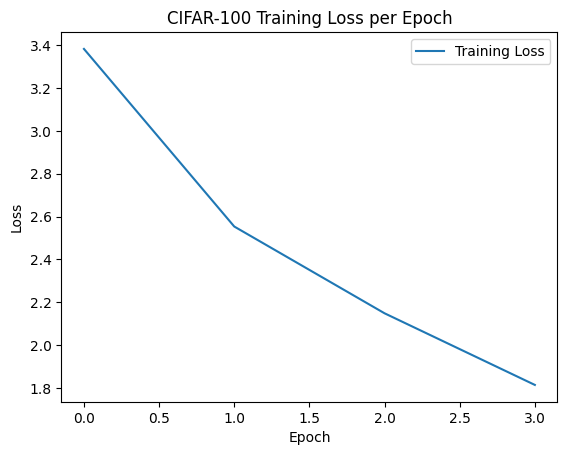


✅ Test Accuracy on CIFAR-100 (100 classes): 41.01%
Model saved as cnn_cifar100.pth


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device configuration (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --------------------------
# Load CIFAR-100 Dataset (Change 1)
# --------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    # The normalization values for CIFAR-100 are slightly different,
    # but using the CIFAR-10 values is a common, acceptable starting point.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Changed to datasets.CIFAR100
trainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Changed to datasets.CIFAR100
testset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# --------------------------
# Define CNN Architecture
# --------------------------
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers remain the same as the image size (32x32) is identical
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Flattened input size remains 64*8*8
        self.fc1 = nn.Linear(64 * 8 * 8, 512)

        # Output Layer changed to 100 classes (Change 2)
        self.fc2 = nn.Linear(512, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# --------------------------
# Initialize Model
# --------------------------
model = CNN().to(device)
# CrossEntropyLoss is still the correct choice for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --------------------------
# Training Loop
# --------------------------
epochs = 4
train_losses = []

print("Starting training on CIFAR-100...")
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")

# --------------------------
# Plot Training Loss
# --------------------------
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CIFAR-100 Training Loss per Epoch")
plt.legend()
plt.show()

# --------------------------
# Evaluate on Test Set
# --------------------------
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\n✅ Test Accuracy on CIFAR-100 (100 classes): {100 * correct / total:.2f}%")

# --------------------------
# Save the model
# --------------------------
torch.save(model.state_dict(), 'cnn_cifar100.pth')
print("Model saved as cnn_cifar100.pth")


Task: Implement transfer learning by fine-tuning a pretrained model like ResNet on a custom dataset.

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import time

# --- 1. CONFIGURATION ---
NUM_CLASSES = 10
BATCH_SIZE = 16
LEARNING_RATE = 0.001
NUM_EPOCHS = 5
IMAGE_SIZE = 224

# Set up device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- 1.5. MODEL CLASS DEFINITION ---
class TransferLearningModel(nn.Module):
    """
    A custom model class for transfer learning with ResNet-18.

    This class loads a pre-trained ResNet-18, freezes its feature-extracting
    layers, and replaces the final fully connected layer with a new one
    for the specified number of classes.
    """
    def __init__(self, num_classes, freeze_features=True):
        super(TransferLearningModel, self).__init__()

        # Load the pre-trained ResNet-18 model
        base_model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

        # Freeze all parameters if requested
        if freeze_features:
            for param in base_model.parameters():
                param.requires_grad = False

        # Get the number of input features for the final layer
        num_ftrs = base_model.fc.in_features

        # Isolate the feature extractor (all layers except the final fc layer)
        self.features = nn.Sequential(*list(base_model.children())[:-1])

        # Create a new classifier (the final layer)
        # This new layer will have requires_grad=True by default
        self.classifier = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        # Pass input through the feature extractor
        x = self.features(x)
        # Flatten the output for the fully connected layer
        x = torch.flatten(x, 1)
        # Pass through the new classifier
        x = self.classifier(x)
        return x

# --- 2. MODEL SETUP ---
# Instantiate the custom model class
model = TransferLearningModel(num_classes=NUM_CLASSES, freeze_features=True)

# Move the model to the selected device
model = model.to(device)

# --- 3. LOSS AND OPTIMIZER ---
criterion = nn.CrossEntropyLoss()

# Set up the optimizer to *only* train the parameters of the new classifier layer
optimizer = optim.Adam(model.classifier.parameters(), lr=LEARNING_RATE)

# --- 4.TRAINING LOOP ---

model.train()  # Set model to training mode

for epoch in range(NUM_EPOCHS):
    start_time = time.time()

    # --- Create a batch of simulated data ---
    # (No DataLoader needed for this simple example)
    inputs = torch.randn(BATCH_SIZE, 3, IMAGE_SIZE, IMAGE_SIZE).to(device)
    labels = torch.randint(0, NUM_CLASSES, (BATCH_SIZE,)).to(device)
    # --- End of simulated data ---

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)

    # --- Calculate Metrics ---
    loss = criterion(outputs, labels)
    _, preds = torch.max(outputs, 1)
    corrects = torch.sum(preds == labels.data)
    accuracy = corrects.double() / BATCH_SIZE
    # --- End of Metrics Calculation ---

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Loss: {loss.item():.4f} | Accuracy: {accuracy.item():.4f} | Time: {epoch_time:.2f}s")






Using device: cuda:0
Epoch 1/5 | Loss: 2.4053 | Accuracy: 0.1250 | Time: 0.02s
Epoch 2/5 | Loss: 2.5429 | Accuracy: 0.0000 | Time: 0.02s
Epoch 3/5 | Loss: 2.6089 | Accuracy: 0.0625 | Time: 0.02s
Epoch 4/5 | Loss: 2.5992 | Accuracy: 0.0625 | Time: 0.02s
Epoch 5/5 | Loss: 2.4137 | Accuracy: 0.1250 | Time: 0.02s


PyTorch Regression (MSELoss + Adam)

--- Step 1: Data Dimensions ---
X (Features) shape: torch.Size([120, 8])
y (Target) shape:   torch.Size([120, 1])
------------------------------

--- Step 2 & 3: Model Architecture and Setup ---
RevenueNet(
  (layer1): Linear(in_features=8, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
)

--- Step 4: Training Process ---
Epoch 01 | Loss: 8.546431
Epoch 02 | Loss: 8.434233
Epoch 03 | Loss: 8.305169
Epoch 04 | Loss: 8.163348
Epoch 05 | Loss: 8.009977
Epoch 06 | Loss: 7.841127
Epoch 07 | Loss: 7.654632
Epoch 08 | Loss: 7.448462
Epoch 09 | Loss: 7.218495
Epoch 10 | Loss: 6.963712
Epoch 11 | Loss: 6.686928
Epoch 12 | Loss: 6.392756
Epoch 13 | Loss: 6.081381
Epoch 14 | Loss: 5.758947
Epoch 15 | Loss: 5.428561
Epoch 16 | Loss: 5.099492
Epoch 17 | Loss: 4.777034
Epoch 18 | Loss: 4.466117
Epoch 19 | Loss: 4.170137
Epoch 20 | Loss: 3.884244
Epoch 21 | Loss: 3.603021
Epoch 22 | Loss: 3.3

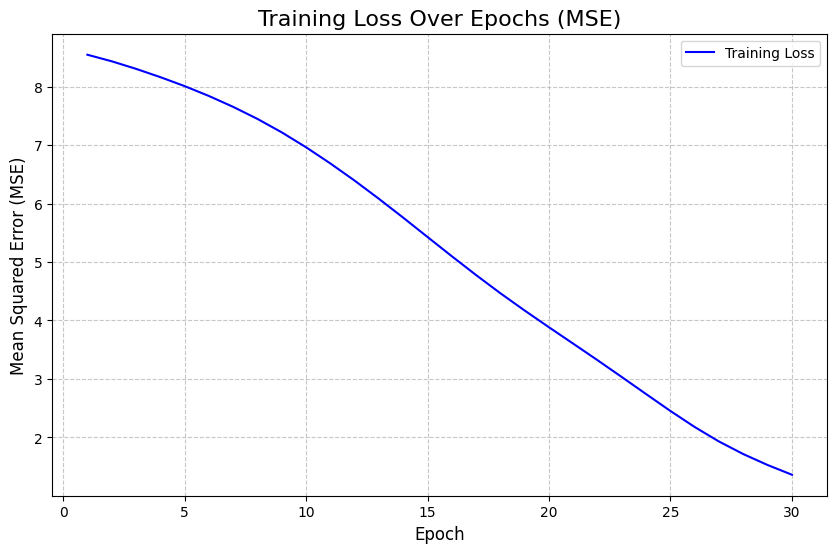

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# --- 1. Data Generation ---

# Set a seed for reproducibility
torch.manual_seed(42)

# Generate feature data X (120 samples, 8 features)
X = torch.randn(120, 8)

# Define "true" weights (w) and bias (b) for the target generation
W_TRUE = torch.randn(8, 1)
B_TRUE = torch.randn(1)

# Generate noise ~ N(0, 0.5)
noise = torch.randn(120, 1) * 0.5

# Create the learnable target y = X @ w + b + noise
y = X @ W_TRUE + B_TRUE + noise

print("--- Step 1: Data Dimensions ---")
print(f"X (Features) shape: {X.shape}")
print(f"y (Target) shape:   {y.shape}")
print("-" * 30)

# --- 2. Model Definition ---

class RevenueNet(nn.Module):
    """
    A simple neural network for regression, predicting a continuous revenue value.
    Architecture: 8 (Input) -> 16 (Hidden) -> 8 (Hidden) -> 1 (Output)
    """
    def __init__(self):
        super(RevenueNet, self).__init__()

        # 1st Hidden Layer: 8 features -> 16 neurons, followed by ReLU
        self.layer1 = nn.Linear(8, 16)

        # 2nd Hidden Layer: 16 neurons -> 8 neurons, followed by ReLU
        self.layer2 = nn.Linear(16, 8)

        # Output Layer: 8 neurons -> 1 output (regression output)
        self.output_layer = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # No activation function for the final layer in regression
        x = self.output_layer(x)
        return x

# --- 3. Model Setup ---

model = RevenueNet()
print("\n--- Step 2 & 3: Model Architecture and Setup ---")
print(model)

# Loss Function: Mean Squared Error (MSE) is standard for regression
criterion = nn.MSELoss()

# Optimizer: Adam with specified learning rate
LEARNING_RATE = 0.010
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# --- 4. Training Loop ---

NUM_EPOCHS = 30
training_loss_history = []

print("\n--- Step 4: Training Process ---")
# Set the model to training mode (important if layers like Dropout were used)
model.train()

for epoch in range(NUM_EPOCHS):
    # 1. Forward Pass: Compute model output
    y_pred = model(X)

    # 2. Compute Loss
    loss = criterion(y_pred, y)

    # 3. Backpropagation: Zero, Backward, Step
    optimizer.zero_grad()  # Reset gradients from the previous iteration
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights

    # Store loss for visualization
    training_loss_history.append(loss.item())

    # Print loss after each epoch
    print(f"Epoch {epoch + 1:02d} | Loss: {loss.item():.6f}")

# --- 5. Loss Visualisation ---

plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_EPOCHS + 1), training_loss_history, label='Training Loss', color='blue')
plt.title('Training Loss Over Epochs (MSE)', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


1) What does a decreasing MSE loss tell you about your model’s learning process?

A decreasing Mean Squared Error (MSE) loss indicates that your model is learning and improving its fit to the training data. Specifically, the predictions it makes (y_pred) are getting progressively closer to the actual target values (y). Since MSE measures the average squared difference between predictions and targets, a lower value means the errors are becoming smaller, suggesting the optimization process (Adam) is successfully adjusting the model's weights and biases.

2) What happens if you increase the learning rate to 0.1? Why?

Increasing the learning rate significantly (e.g., from 0.01 to 0.1) often leads to unstable training, oscillation, or divergence.

Why: The learning rate dictates the size of the step the optimizer takes in the direction of the steepest gradient. If the step is too large (high LR), the model might repeatedly overshoot the minimum of the loss function. Instead of settling in the valley of the minimum, it might jump back and forth across it or even completely jump out of the minimum, causing the loss to spike and become very high (divergence) or to jump erratically (oscillation).

3) How does adding more noise to your target (y) affect training performance?

Adding more noise increases the inherent randomness or uncertainty in the target data. This generally leads to slower convergence and a higher final loss value.

Effect: The loss function has a minimum value called the "irreducible error," which is the error due to the noise itself (the part of the data that cannot be explained by the input features). Increasing the noise increases this irreducible error, meaning the best possible fit the model can achieve will result in a higher MSE. It also makes the loss landscape bumpier, potentially making it harder for the optimizer to find a stable minimum.

4) Why is MSELoss appropriate for regression problems instead of BCELoss?

MSELoss (Mean Squared Error) is appropriate for regression because it works with continuous, real-valued outputs (like revenue, temperature, or price). It penalizes large errors quadratically, encouraging the model to make predictions as close to the actual number as possible.

BCELoss (Binary Cross-Entropy Loss) is appropriate for binary classification problems. It is designed to measure the performance of a model whose output is a probability value (a number between 0 and 1, usually passed through a Sigmoid activation) and is used when the target variable is binary (e.g., 0 or 1, Cat or Dog).

5) In what real-world cybersecurity scenario might regression modelling be used?

Regression modeling is commonly used in cybersecurity for risk and anomaly prediction where the output is a continuous scale:

Predicting Attack Severity/Damage: A model could take features like the type of vulnerability, the targeted system's criticality, and network traffic volume to predict a continuous score representing the potential financial or operational damage (e.g., a predicted cost in dollars or a severity score from 0 to 100) of a detected security incident.

Predicting Network Latency or Throughput: Regression can predict normal network behavior (latency or throughput) to establish a baseline. When actual measurements significantly deviate from the predicted baseline, it signals an anomaly (e.g., a Denial-of-Service attack or a system compromise) that warrants investigation.

PyTorch Regression (MSELoss + SGD)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# --- Step 1: Data Generation ---

# Set a seed for reproducibility
torch.manual_seed(42)

# Generate feature data X (120 samples, 8 features)
X = torch.randn(120, 8)

# Define constants for the true linear relationship
# True weight vector (8x1)
w = torch.randn(8, 1)
# True bias scalar
b = torch.randn(1)
# Noise term
noise = torch.randn(120, 1) * 0.5  # Mean 0, Std Dev 0.5

# Create a learnable target
# y = X @ w + b + noise
y = X @ w + b + noise

print("✅ Step 1: Data Generation Complete")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# --- Step 2: Model Definition ---

class RevenueNet(nn.Module):
    """
    A simple three-layer neural network for regression.
    Input (8) -> Hidden (16) -> Hidden (8) -> Output (1)
    """
    def __init__(self, input_size=8):
        super(RevenueNet, self).__init__()
        # Input: 8 -> Hidden: 16 (ReLU)
        self.fc1 = nn.Linear(input_size, 16)
        # Hidden: 16 -> Hidden: 8 (ReLU)
        self.fc2 = nn.Linear(16, 8)
        # Hidden: 8 -> Output: 1 (No activation for regression)
        self.fc3 = nn.Linear(8, 1)
        # ReLU activation for hidden layers
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Final output layer for regression
        return x

# Initialize model
model = RevenueNet()

print("\n✅ Step 2: Model Definition Complete")
print("Model Architecture:")
print(model)

# --- Step 3: Model Setup ---

# Loss Function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Optimizer: Stochastic Gradient Descent (SGD)
# Changed from Adam to SGD
learning_rate = 0.010
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

print("\n✅ Step 3: Model Setup Complete (Using SGD Optimizer)")

# --- Step 4: Training Loop ---

epochs = 30
loss_history = []

print("\n✅ Step 4: Training Loop Started...")
for epoch in range(epochs):
    # Set model to training mode (important for layers like Dropout/BatchNorm, but good practice)
    model.train()

    # 1. Forward pass: Compute predicted y by passing X to the model
    predictions = model(X)

    # 2. Compute loss
    loss = criterion(predictions, y)
    loss_history.append(loss.item())

    # 3. Zero gradients
    # Clear old gradients from the previous step (otherwise they accumulate)
    optimizer.zero_grad()

    # 4. Backward pass: Compute gradient of the loss with respect to all the learnable parameters
    loss.backward()

    # 5. Update weights: Based on the gradients, take an optimization step
    # Performs a single optimization step (parameter update)
    optimizer.step()

    # Print loss every epoch
    print(f"Epoch {epoch + 1:02d} | Loss: {loss.item():.6f}")

print("✅ Step 4: Training Loop Complete")

# --- Step 5: Loss Visualisation ---

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_history, marker='o', linestyle='-', color='b')
plt.title('Training Loss Across Epochs (MSELoss + SGD)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

print("\n✅ Step 5: Loss Visualization Displayed")

Practical Task 2: PyTorch Classification (BCELoss + SGD)

--- Step 1: Data Dimensions ---
X (Features) shape: torch.Size([200, 4])
y (Target) shape:   torch.Size([200, 1])
------------------------------

--- Step 3: Model Architecture and Setup ---
RiskNN(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
)

--- Step 4: Training Process ---
Epoch 01: loss=0.6552
Epoch 02: loss=0.6502
Epoch 03: loss=0.6454
Epoch 04: loss=0.6409
Epoch 05: loss=0.6366
Epoch 06: loss=0.6325
Epoch 07: loss=0.6285
Epoch 08: loss=0.6248
Epoch 09: loss=0.6212
Epoch 10: loss=0.6177
Epoch 11: loss=0.6144
Epoch 12: loss=0.6113
Epoch 13: loss=0.6082
Epoch 14: loss=0.6053
Epoch 15: loss=0.6025


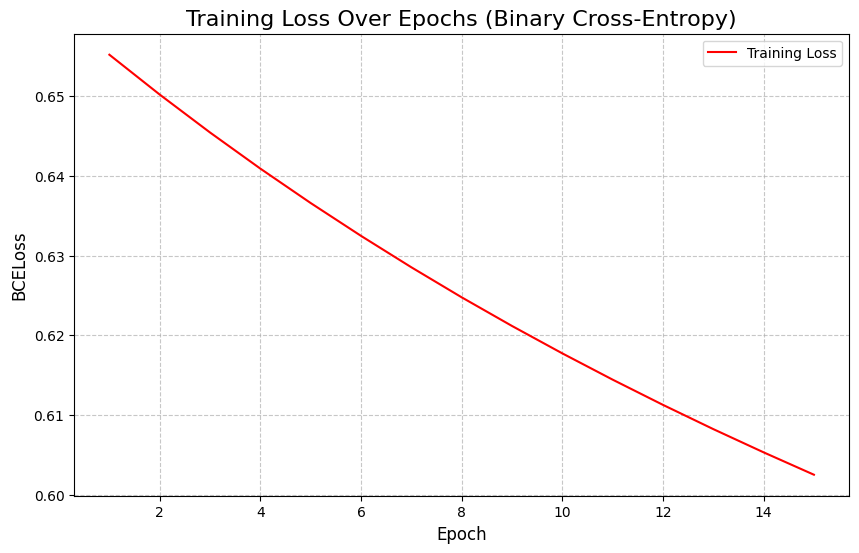

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# --- 1. Data Generation (Learnable Binary Target) ---

# Set a seed for reproducibility
torch.manual_seed(42)

# 1) Generate input features X (200 samples, 4 features)
X = torch.randn(200, 4)

# 2) Define weights and bias for the logistic model
w = torch.tensor([[0.8], [0.6], [0.7], [0.5]]) # 4x1
b = torch.tensor([-1.0])

# 3) Generate noise (to make the problem slightly harder)
noise = 0.3 * torch.randn(200, 1)

# Calculate the logits (linear combination) and apply Sigmoid
# Sigmoid ensures the output 'proba' is between 0 and 1
proba = torch.sigmoid(X @ w + b + noise)  # values in (0, 1), shape (200, 1)

# 4) Create binary labels (0/1) based on a 0.5 threshold
y = (proba > 0.5).float()                 # binary labels, shape (200, 1)

print("--- Step 1: Data Dimensions ---")
print(f"X (Features) shape: {X.shape}")
print(f"y (Target) shape:   {y.shape}")
print("-" * 30)

# --- 2. Model Definition (RiskNN) ---

class RiskNN(nn.Module):
    """
    A simple neural network for binary classification (Risk/No Risk).
    Architecture: 4 (Input) -> 8 (Hidden) -> 1 (Output, Sigmoid)
    """
    def __init__(self):
        super(RiskNN, self).__init__()

        # Hidden Layer: 4 features -> 8 neurons, followed by ReLU
        self.layer1 = nn.Linear(4, 8)

        # Output Layer: 8 neurons -> 1 output
        # Sigmoid activation is applied in the forward pass
        self.output_layer = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        # Sigmoid activation ensures the output is a probability between 0 and 1
        x = torch.sigmoid(self.output_layer(x))
        return x

# --- 3. Model Setup (BCELoss + SGD) ---

model = RiskNN()
print("\n--- Step 3: Model Architecture and Setup ---")
print(model)

# Loss Function: Binary Cross-Entropy (BCE) is standard for binary classification
criterion = nn.BCELoss()

# Optimizer: Stochastic Gradient Descent (SGD) with specified learning rate
LEARNING_RATE = 0.05
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

# --- 4. Training Loop ---

NUM_EPOCHS = 15
training_loss_history = []

print("\n--- Step 4: Training Process ---")
model.train() # Set the model to training mode

for epoch in range(NUM_EPOCHS):
    # 1. Forward Pass
    y_pred = model(X)

    # 2. Compute Loss
    # Note: BCELoss requires both inputs (preds and targets) to be float tensors of the same shape
    loss = criterion(y_pred, y)

    # 3. Backpropagation: Zero, Backward, Step
    optimizer.zero_grad() # Reset gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights

    # Store loss for visualization
    training_loss_history.append(loss.item())

    # Print loss after each epoch
    print(f"Epoch {epoch + 1:02d}: loss={loss.item():.4f}")

# --- 5. Loss Visualisation ---

plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_EPOCHS + 1), training_loss_history, label='Training Loss', color='red')
plt.title('Training Loss Over Epochs (Binary Cross-Entropy)', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('BCELoss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


BCELoss vs. MSELoss:BCELoss is appropriate for this task because it handles probabilities (0 to 1) against a binary target (0 or 1), efficiently penalizing high-confidence incorrect predictions.MSELoss is preferred for regression tasks where the target is a continuous, real number (e.g., price or temperature).

Removing Sigmoid:Removing the Sigmoid while keeping BCELoss causes the network output to be unbounded (logits), leading to numerical instability and potential NaN values, as BCELoss expects inputs to be probabilities in the range $$0, 1$$. The best practice is to use BCEWithLogitsLoss which handles the Sigmoid internally and stably.

High SGD Learning Rate (e.g., 0.2):It causes the optimizer to take steps that are too large, leading to unstable training. This typically results in the loss oscillating wildly or diverging (failing to converge) because the model repeatedly overshoots the minimum loss point.

Increased Noise in Labels:Higher noise increases the irreducible error in the data. The loss curve will show slower initial descent and will ultimately plateau at a higher minimum value, as the perfect fit becomes impossible due to the randomness in the targets.

Class Imbalance (90% '0's):The primary fix is to adjust the BCELoss criterion by using the weight parameter. You would assign a higher weight to the minority class (class 1) to force the model to pay more attention to correctly classifying those rare examples. Alternatively, use data techniques like oversampling the minority class.

BCELoss + Adam

✅ Step 1: Data Generation Complete
X shape: torch.Size([200, 4]) (Features)
y shape: torch.Size([200, 1]) (Binary Targets)

✅ Step 2: Model Definition Complete

✅ Step 3: Model Setup Complete (Using BCELoss and Adam Optimizer)
Model Architecture:
RiskNN(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

✅ Step 4: Training Loop Started...
Epoch 01: loss=0.6552
Epoch 02: loss=0.6415
Epoch 03: loss=0.6284
Epoch 04: loss=0.6157
Epoch 05: loss=0.6034
Epoch 06: loss=0.5914
Epoch 07: loss=0.5797
Epoch 08: loss=0.5684
Epoch 09: loss=0.5574
Epoch 10: loss=0.5466
Epoch 11: loss=0.5361
Epoch 12: loss=0.5258
Epoch 13: loss=0.5157
Epoch 14: loss=0.5056
Epoch 15: loss=0.4958
✅ Step 4: Training Loop Complete


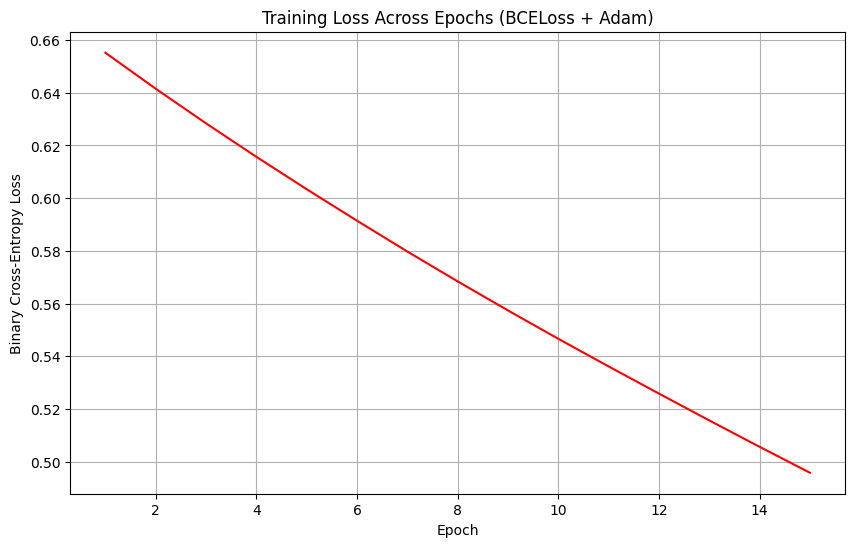


✅ Step 5: Loss Visualization Displayed


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# --- Step 1: Data Generation (Learnable Binary Target) ---
# Set a seed for reproducibility
torch.manual_seed(42)

# 1. Generate input features X (200 samples, 4 features)
X = torch.randn(200, 4)

# 2. Define constants for the true logistic model
w = torch.tensor([[0.8], [0.6], [0.7], [0.5]])
b = torch.tensor([-1.0])
noise = 0.3 * torch.randn(200, 1)

# 3. Calculate probability using a noisy logistic model
# The output is passed through sigmoid to get values in (0, 1)
proba = torch.sigmoid(X @ w + b + noise)

# 4. Create binary labels: if proba > 0.5, label is 1, else 0.
y = (proba > 0.5).float()

print("✅ Step 1: Data Generation Complete")
print(f"X shape: {X.shape} (Features)")
print(f"y shape: {y.shape} (Binary Targets)")


# --- Step 2: Model Definition (RiskNN) ---
class RiskNN(nn.Module):
    """
    A simple feedforward network for binary classification.
    Input (4) -> Hidden (8, ReLU) -> Output (1, Sigmoid)
    """
    def __init__(self, input_size=4):
        super(RiskNN, self).__init__()
        # Hidden layer with ReLU activation
        self.fc1 = nn.Linear(input_size, 8)
        self.relu = nn.ReLU()

        # Output layer with Sigmoid activation for binary classification
        # Sigmoid compresses the output to a probability between 0 and 1
        self.fc2 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Initialize model
model = RiskNN()

print("\n✅ Step 2: Model Definition Complete")


# --- Step 3: Model Setup (BCELoss + Adam) ---

# 1. Instantiate the RiskNN model (already done above)
# 2. Loss Function: Binary Cross-Entropy (BCELoss)
criterion = nn.BCELoss()

# 3. Optimizer: Adam (Adaptive Moment Estimation)
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("\n✅ Step 3: Model Setup Complete (Using BCELoss and Adam Optimizer)")
print("Model Architecture:")
print(model)


# --- Step 4: Training Loop ---

epochs = 15
loss_history = []

print("\n✅ Step 4: Training Loop Started...")
for epoch in range(epochs):
    # Set model to training mode
    model.train()

    # 1. Forward pass: Compute predicted probabilities
    preds = model(X)

    # 2. Compute loss
    # BCELoss expects both predictions and targets to be float tensors
    loss = criterion(preds, y)
    loss_history.append(loss.item())

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backward pass: Compute gradient of the loss
    loss.backward()

    # 5. Update weights: Take an optimization step
    optimizer.step()

    # Record and print loss each epoch
    print(f"Epoch {epoch + 1:02d}: loss={loss.item():.4f}")

print("✅ Step 4: Training Loop Complete")


# --- Step 5: Loss Visualisation ---

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_history, linestyle='-', color='r')
plt.title('Training Loss Across Epochs (BCELoss + Adam)')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)
plt.show()

print("\n✅ Step 5: Loss Visualization Displayed")


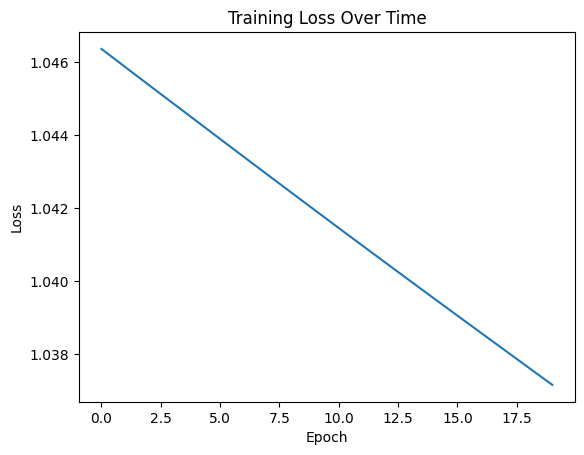

In [22]:
# --- Part 3: Basic Neural Network Implementation ---

# Task 3a: Neural Network Construction
# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 5)  # Input layer: 10 features -> 5 neurons
        self.fc2 = nn.Linear(5, 3)   # Hidden layer: 5 neurons -> 3 neurons
        self.fc3 = nn.Linear(3, 1)   # Output layer: 3 neurons -> 1 neuron

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Instantiate the model
model = SimpleNN()
criterion = nn.MSELoss()  # Mean Squared Error loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer

# Generate synthetic data
data = torch.randn(100, 10)  # 100 samples, 10 features each
target = torch.randn(100, 1)  # 100 target values

# Training the network
losses = []
for epoch in range(20):  # Train for 20 epochs
    optimizer.zero_grad()  # Zero the gradients
    output = model(data)  # Forward pass
    loss = criterion(output, target)  # Compute the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    losses.append(loss.item())  # Record the loss

# Plotting the training loss over time
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


